### Student Information
Name: 紀維鑫 Kevin

Student ID: 109006241

GitHub ID: [KevinKarnadi](https://github.com/KevinKarnadi)

Kaggle name: Kevin Karnadi

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

### **Part I**

Exercises from DM2023-Lab2-Master

In [1]:
import pandas as pd

anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

**>>> Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count_vect_train = CountVectorizer(stop_words='english')
X_counts_train = count_vect_train.fit_transform(train_df['text'])
count_vect_test = CountVectorizer(stop_words='english')
X_counts_test = count_vect_test.fit_transform(test_df['text'])

term_frequencies_train = np.asarray(X_counts_train.sum(axis=0))[0]
term_frequencies_test = np.asarray(X_counts_test.sum(axis=0))[0]

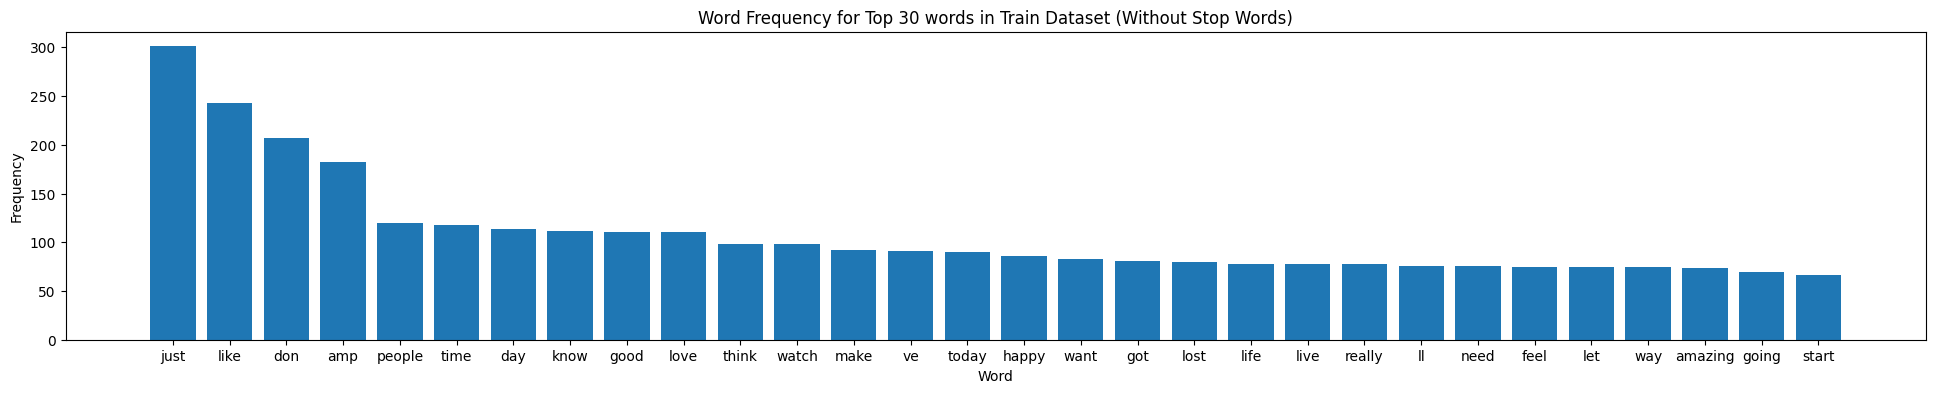

In [3]:
import matplotlib.pyplot as plt

names = count_vect_train.get_feature_names_out()
freq = term_frequencies_train

combined = list(zip(names, freq))
sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_freq)

plt.figure(figsize=(24, 4))
plt.bar(names[:30], freq[:30])
plt.title('Word Frequency for Top 30 words in Train Dataset (Without Stop Words)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

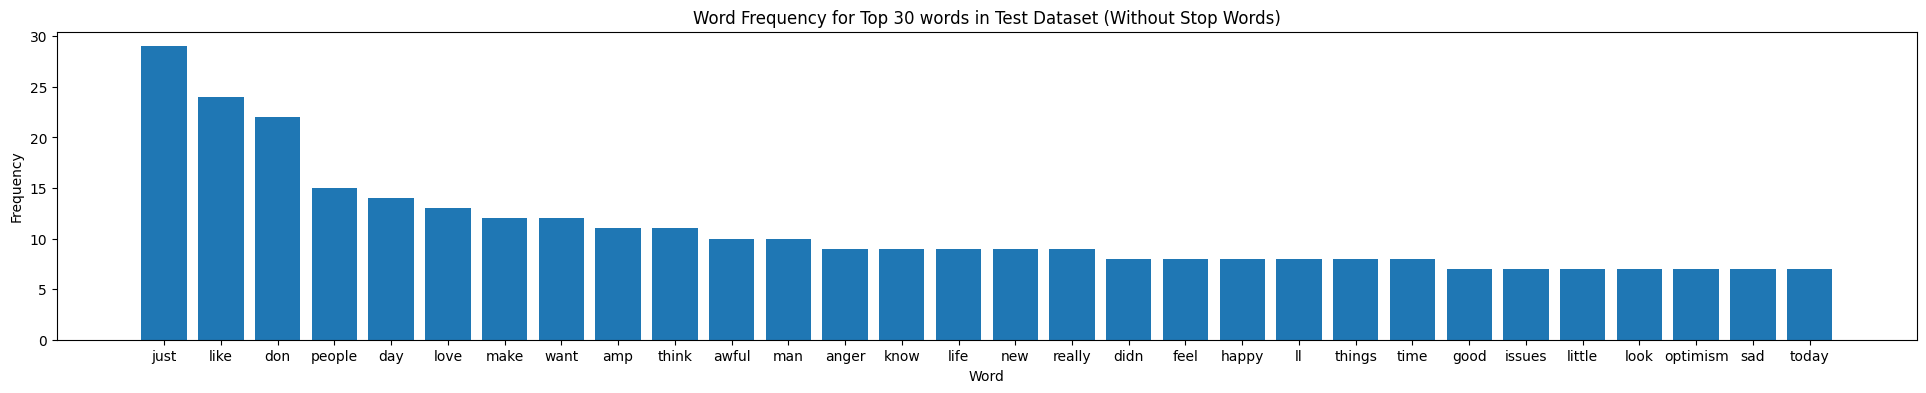

In [4]:
import matplotlib.pyplot as plt

names = count_vect_test.get_feature_names_out()
freq = term_frequencies_test

combined = list(zip(names, freq))
sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_freq)

plt.figure(figsize=(24, 4))
plt.bar(names[:30], freq[:30])
plt.title('Word Frequency for Top 30 words in Test Dataset (Without Stop Words)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

**>>> Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

tfidf_vect.fit(train_df['text'])

train_data_tfidf_features = tfidf_vect.transform(train_df['text'])
test_data_tfidf_features = tfidf_vect.transform(test_df['text'])

feature_names_tfidf = tfidf_vect.get_feature_names_out()
feature_names_tfidf[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [9]:
"😂" in feature_names_tfidf

True

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



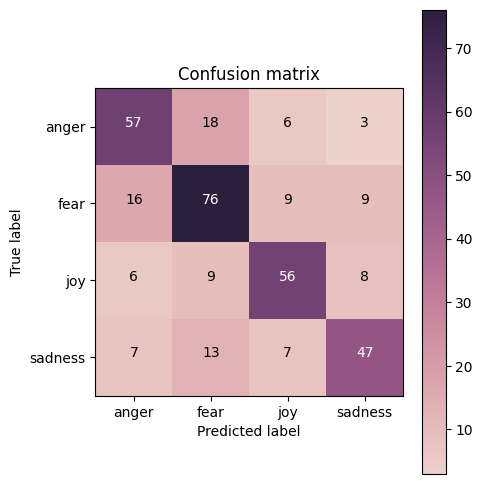

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

**>>> Exercise 3 (Take home):**
Can you interpret the results above? What do they mean?

**Answer:**

From the classification report:
- We can see that the *joy* label has the highest f1-score, meaning that it is the most correctly predicted label.
- For the *sadness* label, its precision value is similar to the precision value of *joy*, but the recall value value is significantly lower, at 0.64. This means that the number of false negative is significantly higher than the number of false positives.
- The *anger* and *fear* has similar precision, recall, and f1-score values.

From the confusion matrix:
- We can see that for the *anger* label, most of them wrongly predicted as *fear*.
- Moreover, for the *fear* label, most of them wrongly predicted as *anger*.
- For the *joy* label, their false predictions seems to be evenly distributed.
- Lastly, for the *sadness* label, most of them wrongly predicted as *fear*.

**>>> Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [15]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



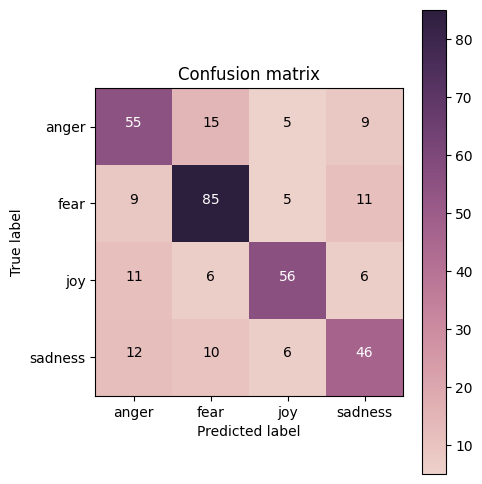

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

**>>> Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer:**

Using the Decision Tree model, we obtained a training accuracy of **0.99** and a validation accuracy of **0.68**. Using the Naive Bayes model, we obtained a training accuracy of **0.79** and a validation accuracy of **0.7**. These results show that although the Decision Tree model performs better on the training data, its performance on the validation data is much lower, indicating an overfitting issue. This is caused by the model that overly memorizes the training data, failing to generalize to unseen data. While for the Naive Bayes model, although it performs worse on the training data, its performance on the validation data is not much lower, and is even higher than the validation accuracy of the Decision Tree model. This means that the Naive Bayes model is the better choice in this case.

In [19]:
import keras
from sklearn.preprocessing import LabelEncoder

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [21]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0   

In [22]:
epochs = 25
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data = (X_test, y_test))

Epoch 1/25


113/113 [==============================] - 1s 4ms/step - loss: 1.3285 - accuracy: 0.3723 - val_loss: 1.2752 - val_accuracy: 0.4380
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9727 - accuracy: 0.6452 - val_loss: 0.9197 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7949 - val_loss: 0.8366 - val_accuracy: 0.6801
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8508 - val_loss: 0.7874 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8857 - val_loss: 0.8223 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9114 - val_loss: 0.8829 - val_accuracy: 0.7032
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9272 - val_loss: 0.8849 - val_accuracy: 0.6916
Epoc

**>>> Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

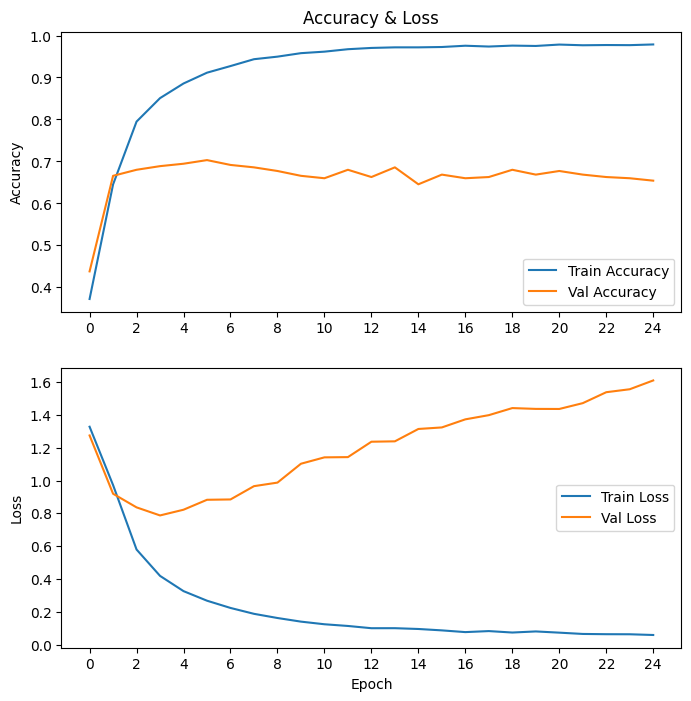

In [23]:
plt.figure(figsize=(8, 8))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
#plt.title('Train & Val Accuracy')
plt.title('Accuracy & Loss')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 25, step=2))
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
#plt.title('Train & Val Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 25, step=2))
plt.legend(loc='center right')

plt.show()

**Interpretation:**

From the Accuracy and Loss plots above, we can see that starting from around the 4th epoch (epoch 3 on the graphs, because it starts from 0), the training accuracy and loss keeps improving, whereas the validation accuracy and loss stops improving (and even starts getting worse for the loss). This means that the model starts to overfit from epoch 4 onwards, where the training performance is high, but the validation performance is significantly worse. At the 1st epoch, both the training and validation accuracies and losses are still bad, meaning that the model suffers from underfitting at the 1st epoch. I'd say the optimal epoch value should be around 2 or 3.

**>>> Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?

**Answer:**

One of the methods is by averaging the word vectors, which is done by taking the average of the word vectors in a sentence. Another method that we can use is Doc2Vec, which can learn vector representations of a whole sentence, not just one word. Other more advanced methods include sequential based models, such as RNN and LSTM, and even a much more complex BERT model, which performs really well on a data that is in the shape of a sequence of words (or sentence).

**Note:** The results in the examples I provided below are very bad, because I didn't perform any tuning on the models and the sentence representation methods. The examples are just for demonstrating how to represent the sentence data as vectors to train the models.

**Example (Averaging Word Vectors):**

In [35]:
from gensim.models import Word2Vec

train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values

vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

In [36]:
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [37]:
def average_word_vec(text):
    word_vec = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    if len(word_vec) == 0:
        return np.zeros(100)
    else:
        return np.array(word_vec).mean(axis=0)

In [38]:
X_train = np.array([average_word_vec(sentence) for sentence in train_df['text_tokenized'].values])
y_train = train_df['emotion']
X_test = np.array([average_word_vec(sentence) for sentence in test_df['text_tokenized'].values])
y_test = test_df['emotion']

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_model = DecisionTreeClassifier(random_state=1)

DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.22


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB_model = GaussianNB()
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.31
testing accuracy: 0.29


**Example (Doc2Vec):**

In [42]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_train = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(train_df['text_tokenized'].values)]
tagged_test = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(test_df['text_tokenized'].values)]

model = Doc2Vec(vector_size=100)
model.build_vocab(tagged_train)
model.train(tagged_train, total_examples=len(tagged_train), epochs=40)

X_train = np.array([model.dv[str(i)] for i in range(len(tagged_train))])
y_train = train_df['emotion']
X_test = np.array([model.infer_vector(tagged_test[i][0]) for i in range(len(tagged_test))])
y_test = test_df['emotion']

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_model = DecisionTreeClassifier(random_state=1)

DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 1.0
testing accuracy: 0.3


In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB_model = GaussianNB()
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.36
testing accuracy: 0.31


**>>> Exercise 8 (Take home):**  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [45]:
from gensim.models import KeyedVectors

model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

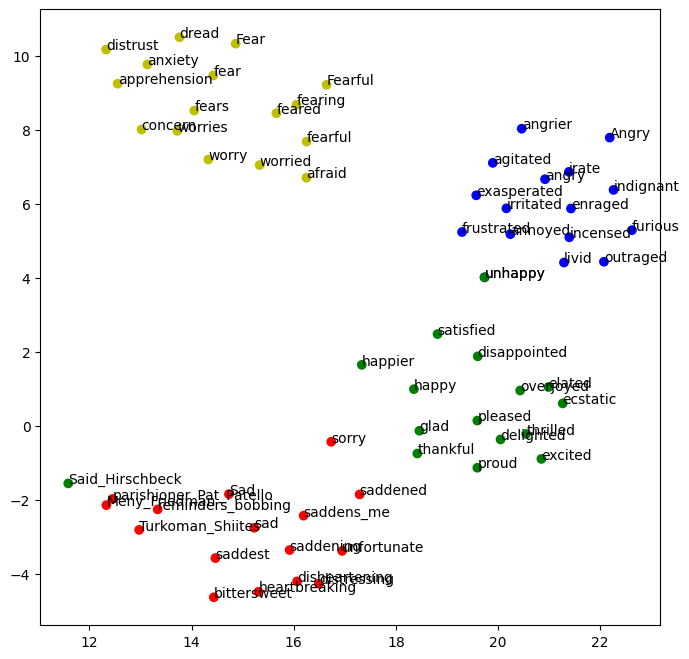

In [46]:
from sklearn.manifold import TSNE

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### **Part II**

Kaggle Competition

#### **Data Preparation**

##### Load & Transform Data

The data in still semi-unstructured, in the form of JSONs and CSVs, so we need to load, prepare, and transform them into the right format so that it can be properly used to train the model.

In [2]:
import numpy as np
import pandas as pd
import json

In [3]:
# Load raw data

data_tweet = []
with open('data/tweets_DM.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        data_tweet.append(data)

data_emotion = pd.read_csv('data/emotion.csv')

data_id = pd.read_csv('data/data_identification.csv')

In [4]:
# Transform tweet json data into a dataframe

flattened_data = {'hashtags': [], 'tweet_id': [], 'text': []}

for entry in data_tweet:
    source_data = entry['_source']['tweet']
    flattened_data['hashtags'].append(source_data['hashtags'])
    flattened_data['tweet_id'].append(source_data['tweet_id'])
    flattened_data['text'].append(source_data['text'])

data_tweet = pd.DataFrame(data_tweet)
source_data = pd.DataFrame(flattened_data)
data_tweet = pd.concat([data_tweet, source_data], axis=1)

In [5]:
data_tweet.head()

,_score,_index,_source,_crawldate,_type,hashtags,tweet_id,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [6]:
data_emotion.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [7]:
data_id.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


##### Split to Train & Test Datasets

The file ```data_identification.csv``` stores information about whether each
tweet data belongs to the training or testing set. So, we will need to split our original dataset (which contains both the training and testing sets) to two separate datasets.

In [8]:
# Split to training and testing datasets
train_id = data_id[data_id['identification'] == 'train']['tweet_id']
test_id = data_id[data_id['identification'] == 'test']['tweet_id']

data_train = data_tweet[data_tweet['tweet_id'].isin(train_id)]
data_test = data_tweet[data_tweet['tweet_id'].isin(test_id)]

# Add labels
data_train = pd.merge(data_train, data_emotion, on='tweet_id', how='left')

# Drop columns that are not going to be used
data_train.drop(['_source', '_score', '_index', '_crawldate', '_type', 'hashtags', 'tweet_id'], axis=1, inplace=True)
data_test.drop(['_source', '_score', '_index', '_crawldate', '_type', 'hashtags'], axis=1, inplace=True)

<ipython-input-8-c8260a917bb1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop(['_source', '_score', '_index', '_crawldate', '_type', 'hashtags'], axis=1, inplace=True)


In [9]:
data_train.head()

,text,emotion
0,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,Still waiting on those supplies Liscus. <LH>,anticipation


In [10]:
data_test.head()

,tweet_id,text
2,0x28b412,"Confident of your obedience, I write to you, k..."
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
9,0x218443,When do you have enough ? When are you satisfi...
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,0x26289a,"In these tough times, who do YOU turn to as yo..."


#### **Exploratory Data Analysis (EDA)**

In [11]:
import matplotlib.pyplot as plt

##### Label Distribution

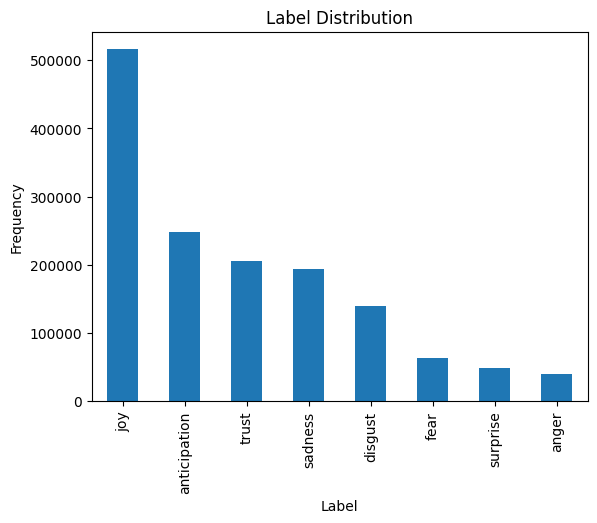

In [12]:
data_train['emotion'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

##### Top Words Frequency

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
def plot_freq(count_vect, X_counts, title):
    term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

    names = count_vect.get_feature_names_out()
    freq = term_frequencies

    combined = list(zip(names, freq))
    sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
    names, freq = zip(*sorted_freq)

    plt.figure(figsize=(20, 4))
    plt.bar(names[:30], freq[:30])
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=-90)
    plt.show()

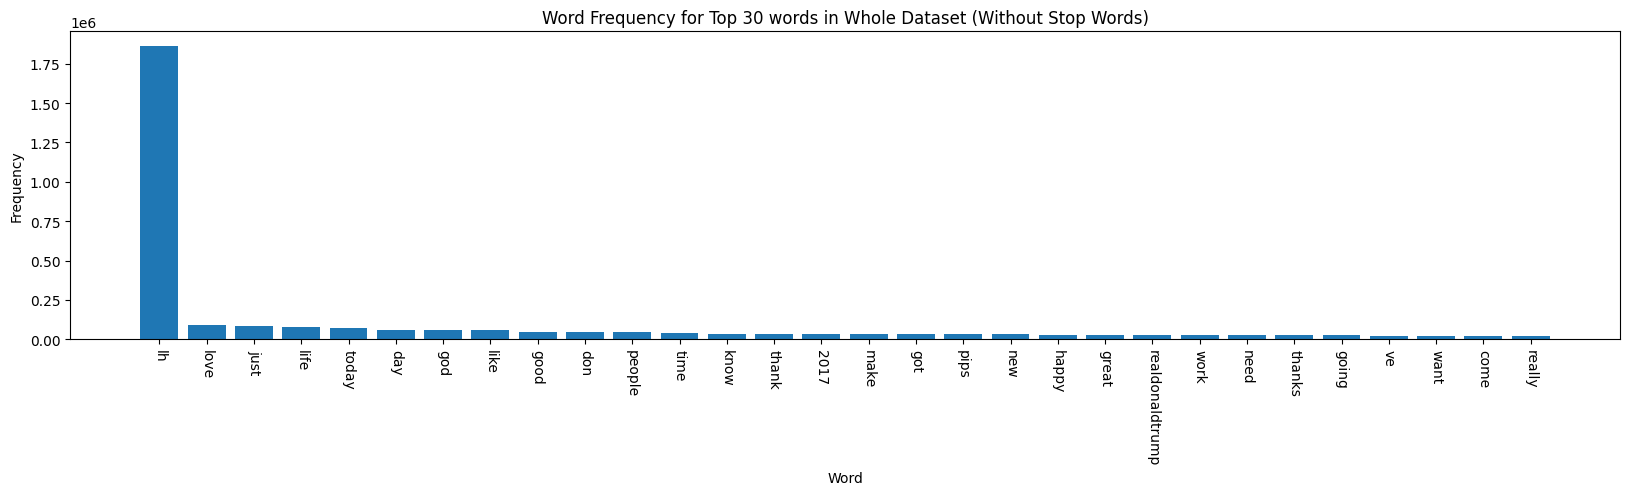

In [15]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train['text'])
title = 'Word Frequency for Top 30 words in Whole Dataset (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

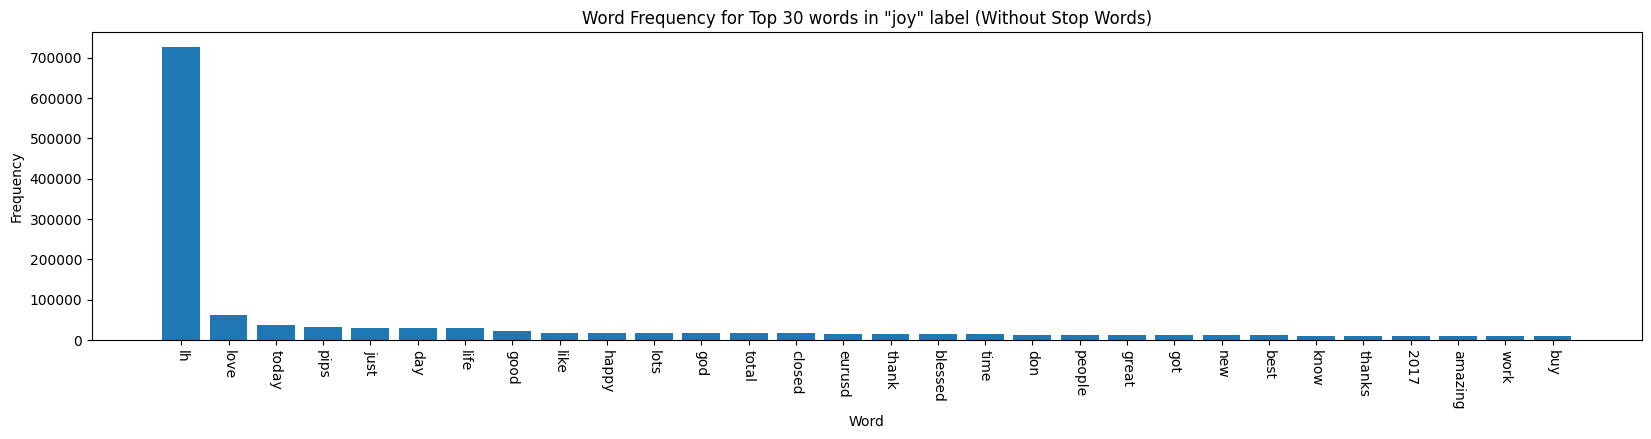

In [16]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'joy']['text'])
title = 'Word Frequency for Top 30 words in "joy" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

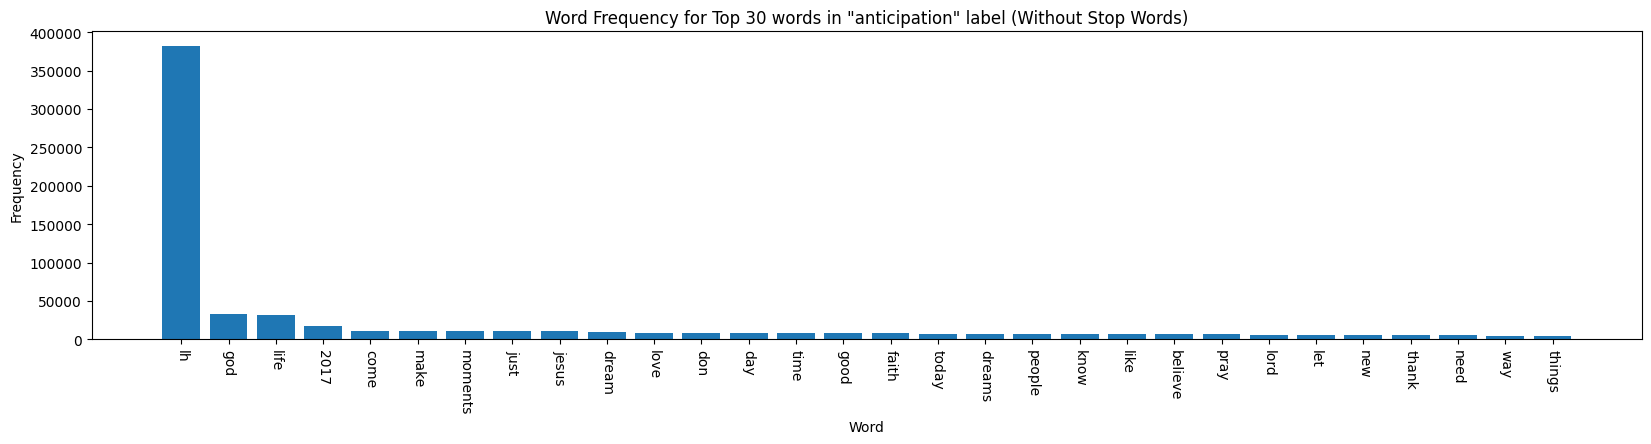

In [17]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'anticipation']['text'])
title = 'Word Frequency for Top 30 words in "anticipation" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

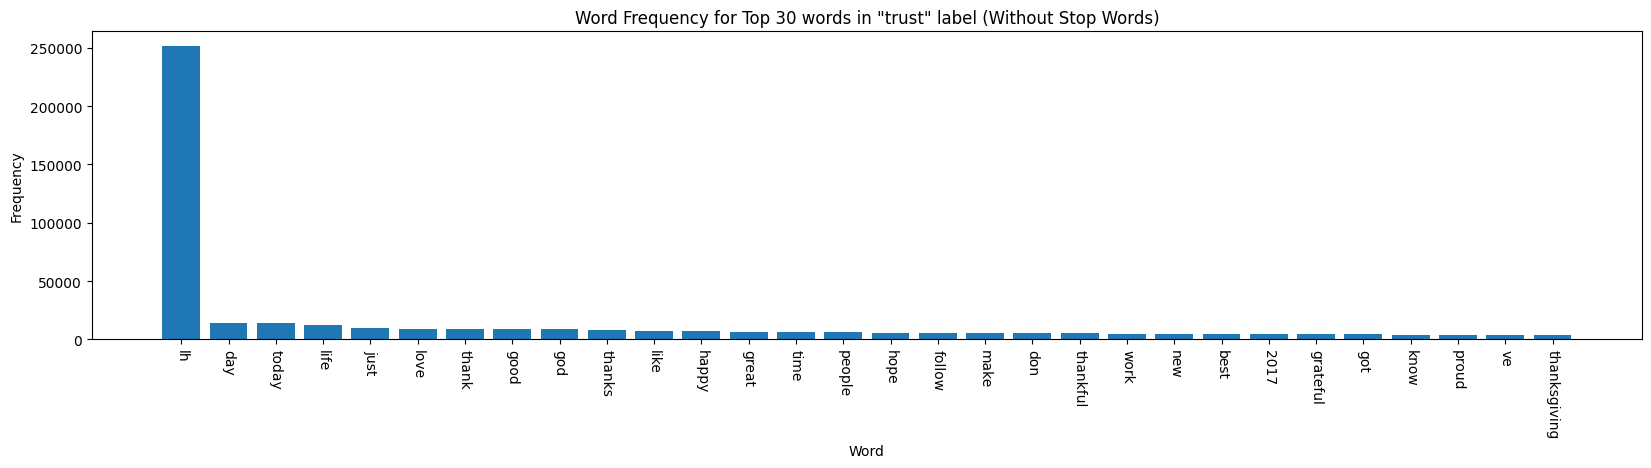

In [18]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'trust']['text'])
title = 'Word Frequency for Top 30 words in "trust" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

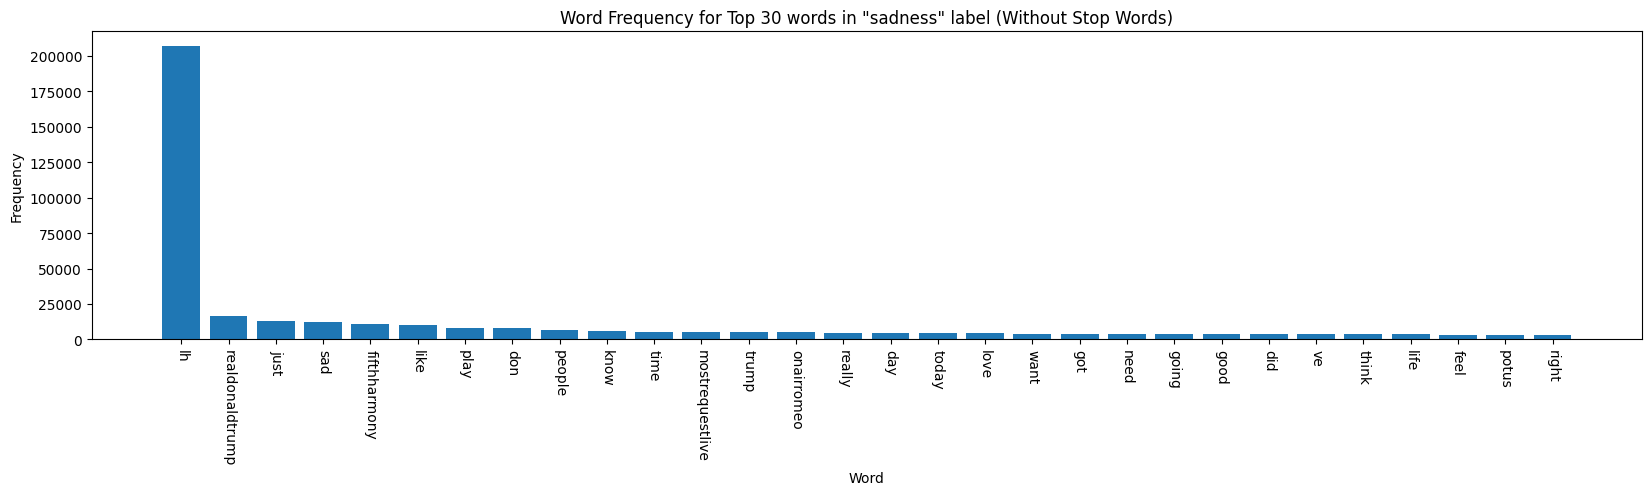

In [19]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'sadness']['text'])
title = 'Word Frequency for Top 30 words in "sadness" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

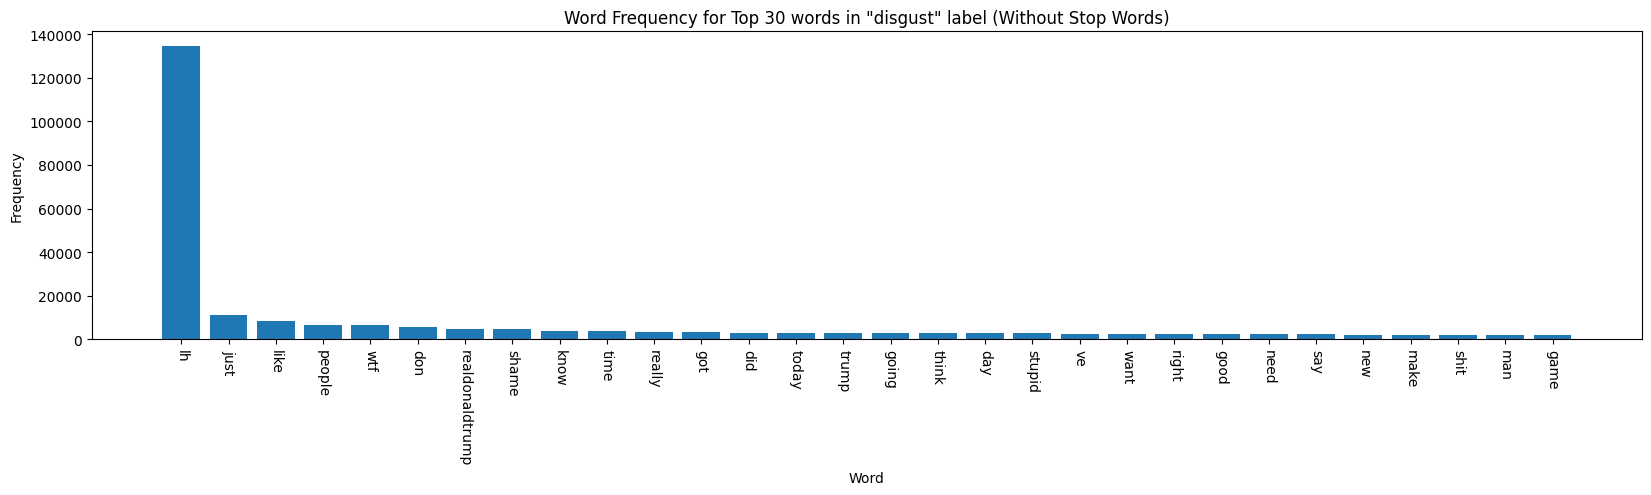

In [20]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'disgust']['text'])
title = 'Word Frequency for Top 30 words in "disgust" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

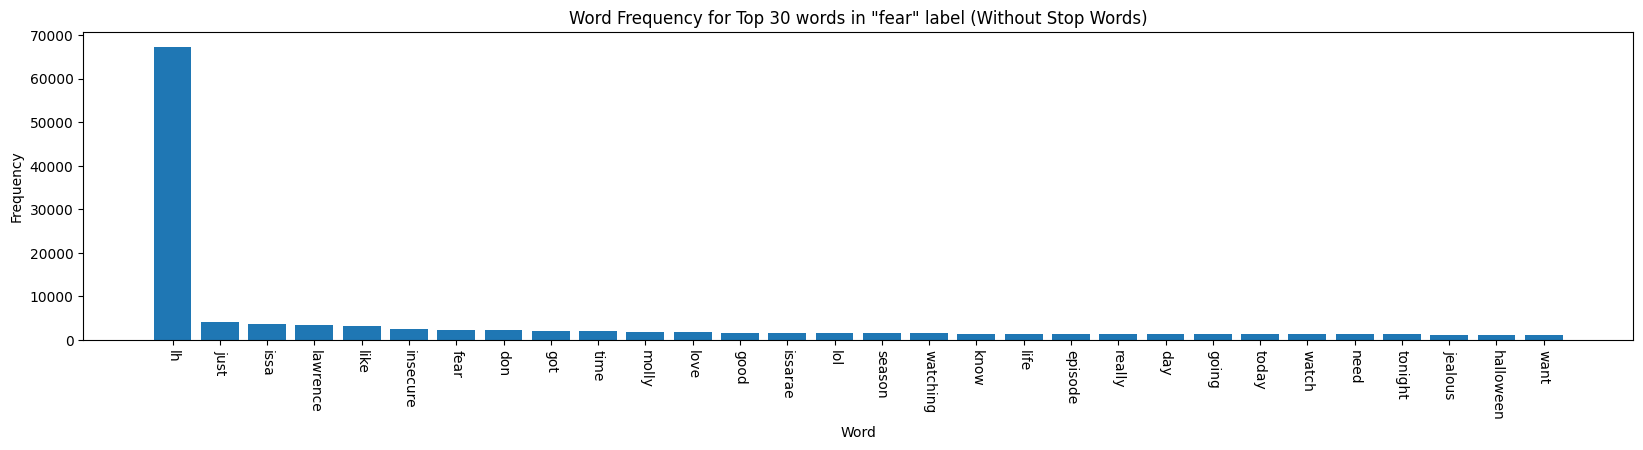

In [21]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'fear']['text'])
title = 'Word Frequency for Top 30 words in "fear" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

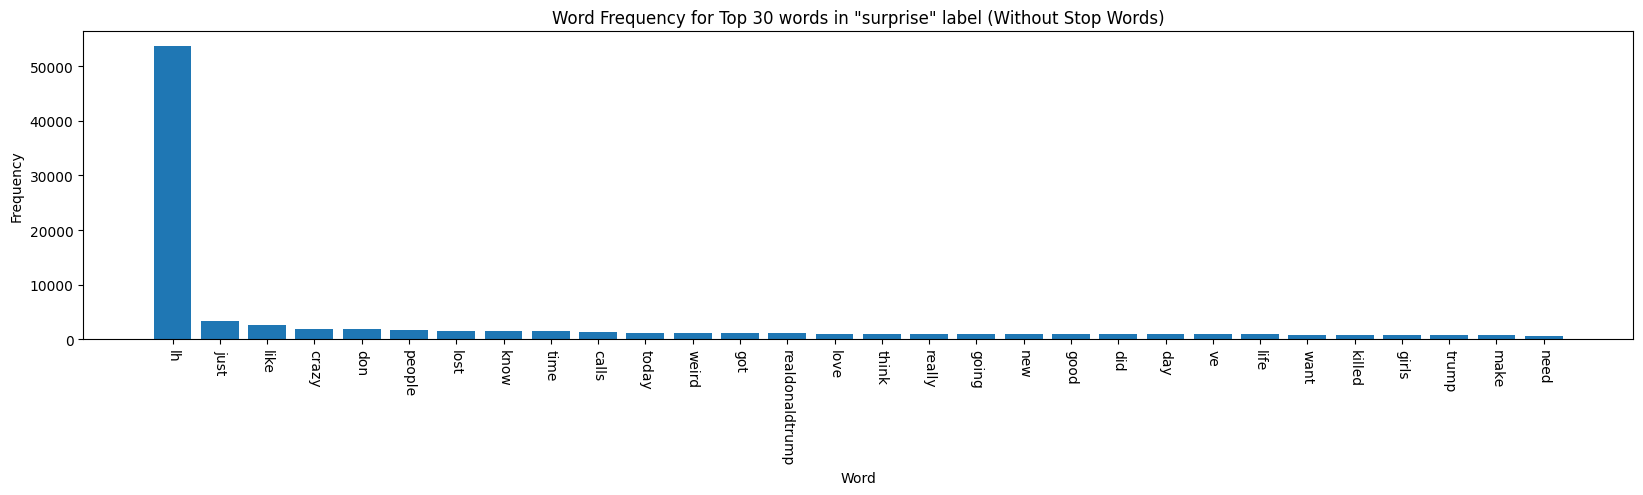

In [22]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'surprise']['text'])
title = 'Word Frequency for Top 30 words in "surprise" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

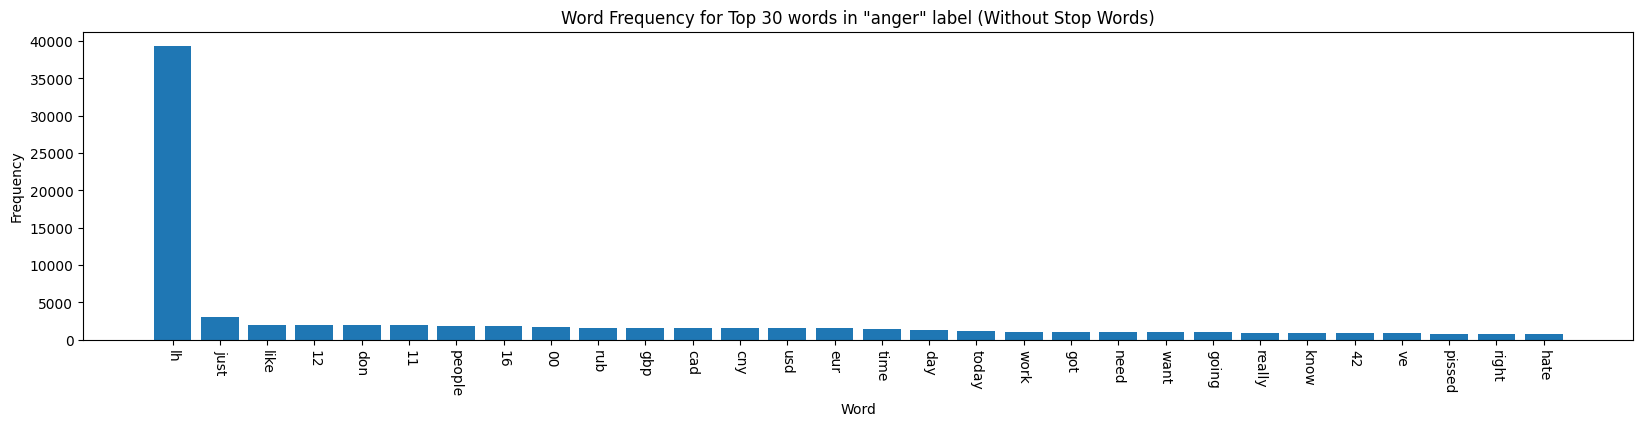

In [23]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(data_train[data_train['emotion'] == 'anger']['text'])
title = 'Word Frequency for Top 30 words in "anger" label (Without Stop Words)'

plot_freq(count_vect, X_counts, title)

#### **Training**

For this task, I chose to use a DistilBERT model to perform the text classification task. DistilBERT is a smaller, faster, cheaper, and lighter version of BERT, which has 40% less parameters and runs 60% faster than BERT, while preserving over 95% of BERT's performance.

The reason of choosing DistilBERT for this task is because it is a SOTA model in the field of NLP, meaning it can handle text classification tasks really well. I didn't use the original BERT model, because it is significantly much more expensive and slower to train, while not having that much of a performance improvement compared to DistilBERT.

More specifically, the DistilBERT model that I use here is a [distilbert-base-uncased-emotion](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion) model , which is a DistilBERT model fine-tuned for detecting emotions in texts, including sadness, joy, love, anger, fear and surprise in Twitter data.

This is the general outline for this part:
1. Encode the labels
   - The model can only accept numbers as labels, so we need to convert the labels first using sklearn's LabelEncoder().
2. Preprocess text data:
   - This is done by using DistilBERT's tokenizer, which can internally perform the text preprocessing for us. So, we don't need to manually preprocess the text data.
3. Build model:
   - The hyperparameters that are tuned here are the ```N_EPOCHS```, ```LEARNING_RATE```, and ```BATCH_SIZE``` parameters.
   - Adam is used as the model's optimizer.
   - An f1-score callback function is used to monitor the validation f1-score at the end of every epoch.

##### Prepare Data for Training

In [25]:
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import datasets
import evaluate
from transformers.keras_callbacks import KerasMetricCallback
from sklearn.preprocessing import LabelEncoder

# Model that we're going to use
MODEL_NAME = 'bhadresh-savani/distilbert-base-uncased-emotion'

In [26]:
# Encode labels to numbers
le = LabelEncoder()
data_train['emotion'] = le.fit_transform(data_train['emotion'])
le.classes_

array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust'], dtype=object)

In [27]:
# Convert to Huggingface dataset format
data_train.rename(columns={'emotion': 'label'}, inplace=True)
features = datasets.Features({'text': datasets.Value('string'), 'label': datasets.ClassLabel(num_classes=8)})
data_train = datasets.Dataset.from_dict(data_train, features=features)

In [28]:
data_train

Dataset({
    features: ['text', 'label'],
    num_rows: 1455563
})

In [30]:
# Preprocess text data

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def preprocess_function(data):
    return tokenizer(data['text'], truncation=True)

data_train = data_train.map(preprocess_function, batched=True, remove_columns=['text'])

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/1455563 [00:00<?, ? examples/s]

In [31]:
data_train

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1455563
})

In [32]:
# Generate 80-20 train-test split, stratified by the labels
data_train = data_train.train_test_split(test_size=0.2, stratify_by_column='label')

In [33]:
data_train

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 1164450
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 291113
    })
})

##### Model Initialization

In [34]:
# Load model
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=8, ignore_mismatched_sizes=True)

tf_model.h5:   0%|          | 0.00/268M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion and are newly initialized because the shapes did not match:
- classifier/kernel:0: found shape (768, 6) in the checkpoint and (768, 8) in the model instantiated
- classifier/bias:0: found shape (6,) in the checkpoint and (8,) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
# Hyperparameters
N_EPOCHS = 2
LEARNING_RATE = 3e-5
BATCH_SIZE = 32

These are the most optimal values of the hyperparameters after I tried to tune them for several times. For the epochs, starting from epoch 3, the model doesn't seem to improve its validation performance, so I decided to use 2 epochs in the end. For the learning rate and batch size, I tried to use different combinations of their values, until I can find the most optimal one.

In [36]:
# Prepare f1-score callback function

f1 = evaluate.load('f1')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return f1.compute(predictions=predictions, references=labels, average='macro')

In [37]:
# Convert data to tf.data.Dataset format

tf_train_dataset = model.prepare_tf_dataset(
    data_train['train'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    tokenizer=tokenizer
)

tf_validation_dataset = model.prepare_tf_dataset(
    data_train['test'],
    shuffle=False,
    batch_size=BATCH_SIZE,
    tokenizer=tokenizer
)

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
# Compile model
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
metrics = ['accuracy']
# Note: Huggingface Transformers models have a default task-relevant loss function, so we don’t need to specify them
model.compile(optimizer=optimizer, metrics=metrics)

# Prepare f1-score callback function
val_metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_dataset)
callbacks = [val_metric_callback]

# Start training
history = model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=N_EPOCHS, callbacks=callbacks)

Using this configuration, I was able to obtain a training and validation accuracy of around **0.67** and **0.65**, and a training and validation loss of around **0.91** and **0.94**, which shows that the model doesn't overfit. Finally, I obtained a macro f1-score of around **0.58** on the validation dataset, which is a pretty satisfying result.

On the Kaggle competition, I was able to get a public leaderboard f1-score of **0.5466** and a private leaderboard f1-score of **0.53284**, which effectively puts me in rank **17** and **15** on the public and private leaderboards, respectively.

#### **Inference**

Now, we can start making predictions. This part is relatively simple:
1. Preprocess test data using tokenizer
2. Perform predictions with the model trained before, using model.predict(). Compute the argmax of the logits to get the predicted labels.

In [ ]:
# Save tweet_id
ids = data_test['tweet_id'].tolist()

In [ ]:
# Prepare and preprocess test data
data_test = tokenizer(data_test['text'].tolist(), padding=True)
data_test = tf.data.Dataset.from_tensor_slices((dict(data_test)))

In [ ]:
# Make predictions
preds = model.predict(data_test)
preds = np.argmax(preds.logits, axis=1)
preds = le.inverse_transform(preds)

In [ ]:
# Create submission file
submission = pd.DataFrame({'id': ids, 'emotion': preds})
submission.to_csv('submission.csv', index=False)

#### **Insights Obtained**

- Using simpler and more traditional methods like BOW and TFIDF combined with simpler ML models like Random Forest and XGBoost might not work well here, as the dataset is very complex.
- Because there are no limitations on what model can be used in this assignment, using a SOTA model like BERT and its variations can give good results.
- However, given the large model size, which means an expensive training cost (both space-wise and time-wise), we need to be very effective and efficient when we want to train and tune the model.
